# HOUSE PRICE PREDICTION

### STEP 1: BUSINESS PROBLEM:-
#### Using information about house prices and features like no.of bedrooms, square footage. etc. train a model that can predict price of new house

### STEP 2: LOADING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### STEP 3: LOAD DATASET

In [3]:
h_data=pd.read_csv("housing_dataset.csv")

In [4]:
h_data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [5]:
h_data.shape

(21613, 21)

In [6]:
h_data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [7]:
h_data.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

In [8]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
 h_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
h_data.drop_duplicates(inplace=True)
h_data.shape

(21613, 21)

In [11]:
h_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [12]:
d =[]
for i in h_data['date'].values:
    d.append(i[:4])
    
h_data['date'] = d

# convert everything to same datatype
for i in h_data.columns:
    h_data[i]=h_data[i].astype(float)
    
#make a new column age of the house  
h_data['age'] = h_data['date'] - h_data['yr_built']

#calculate the total years of renovation
h_data['renov_age'] = np.abs(h_data['yr_renovated'] - h_data['yr_built'])
h_data['renov_age'] = h_data.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

#remove unwanted columns like yr_built, date, id
h_data.drop(['id','date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
h_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       1.00       1180.0    5650.0     1.0         0.0   
1  538000.0       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  180000.0       2.0       1.00        770.0   10000.0     1.0         0.0   
3  604000.0       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  510000.0       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
0   0.0        3.0    7.0      1180.0            0.0  98178.0  47.5112   
1   0.0        3.0    7.0      2170.0          400.0  98125.0  47.7210   
2   0.0        3.0    6.0       770.0            0.0  98028.0  47.7379   
3   0.0        5.0    7.0      1050.0          910.0  98136.0  47.5208   
4   0.0        3.0    8.0      1680.0            0.0  98074.0  47.6168   

      long  sqft_living15  sqft_lot15   age  renov_age  
0 -122.257         1340.0      5650.0  59.0        0.0  
1 -122.319         1690.0      7639.0  63.0       40.0  
2 -122.233         2720.0      8062.0  82.0        0.0  
3 -122.393         1360.0      5000.0  49.0        0.0  
4 -122.045         1800.0      7503.0  28.0        0.0

In [13]:
h_data.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
age              float64
renov_age        float64
dtype: object

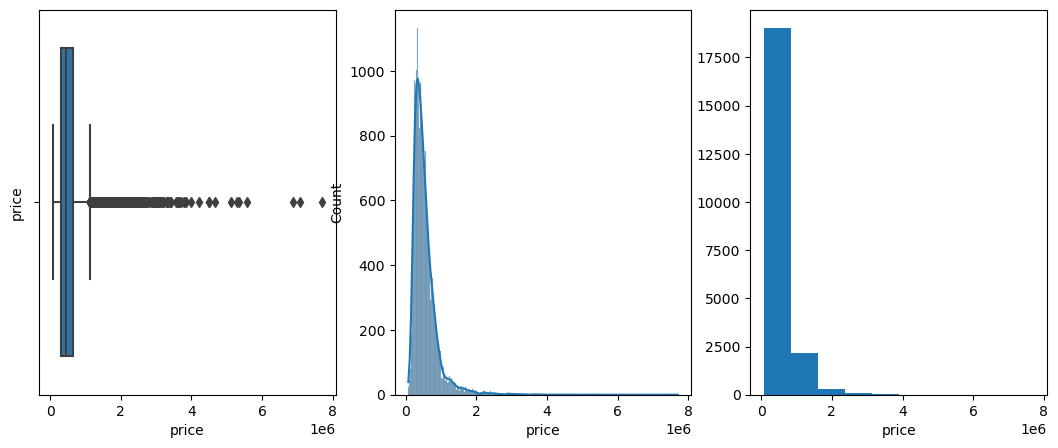

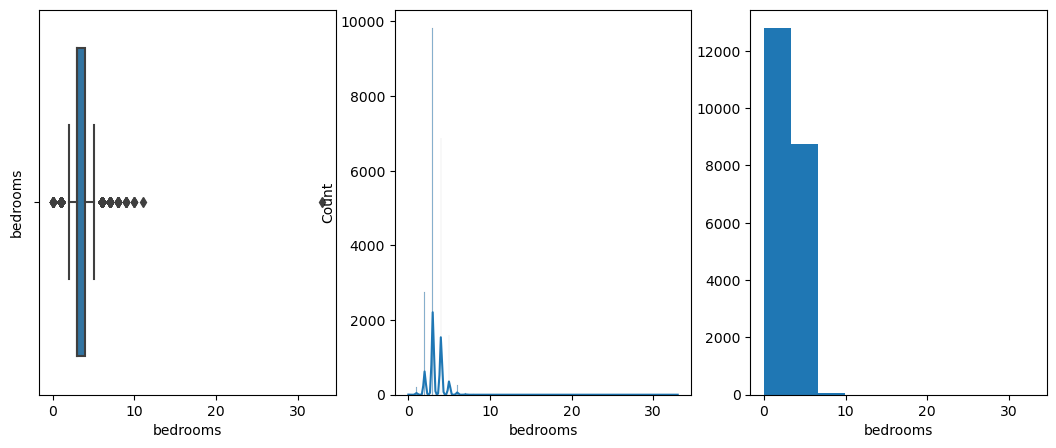

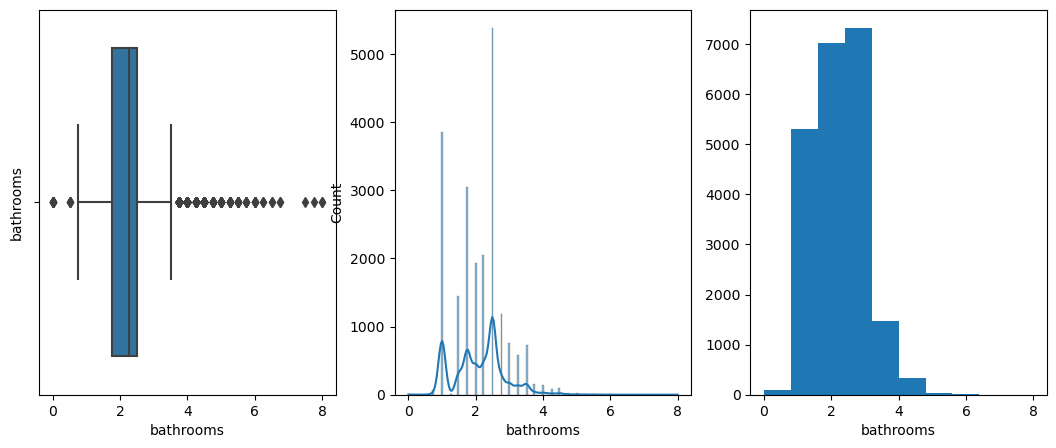

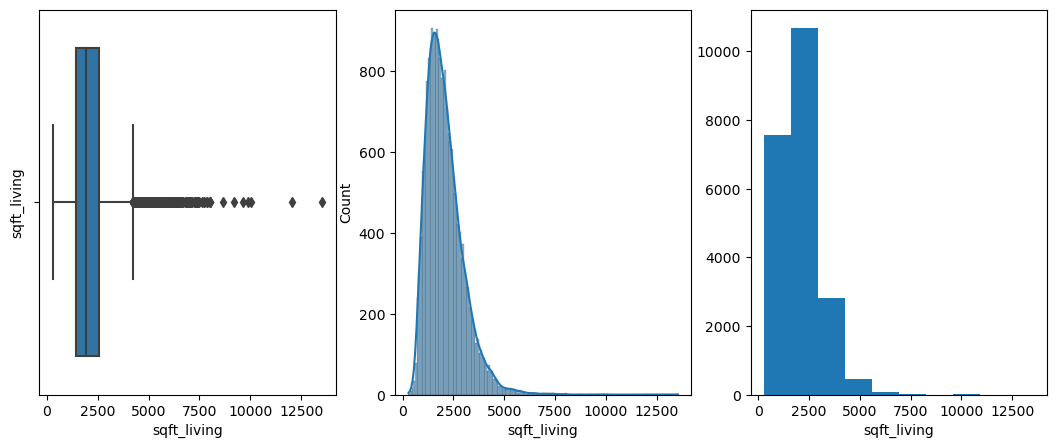

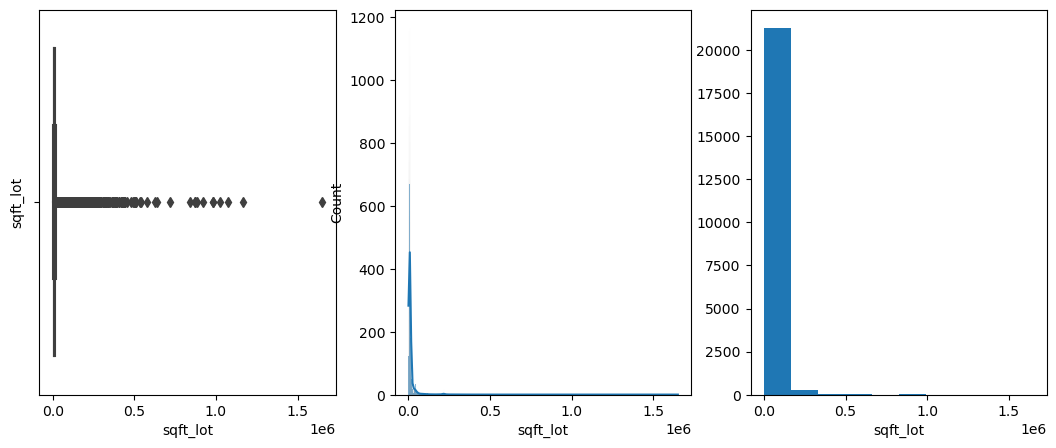

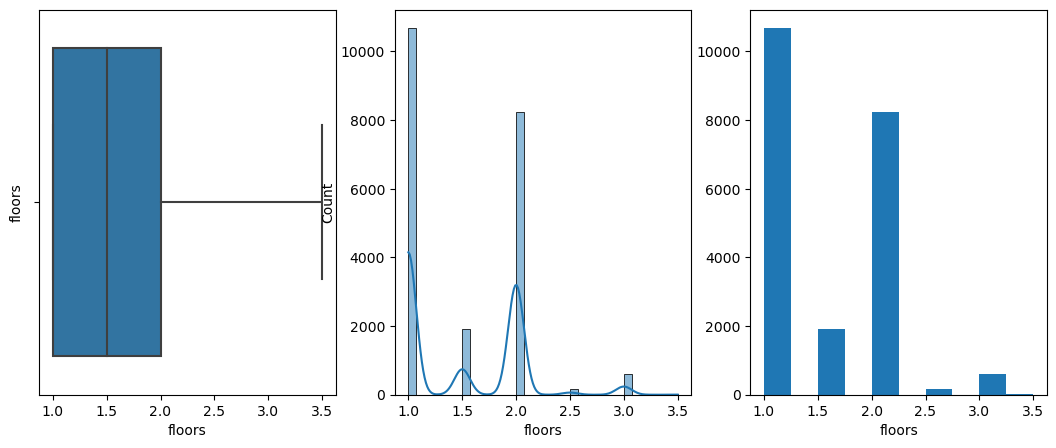

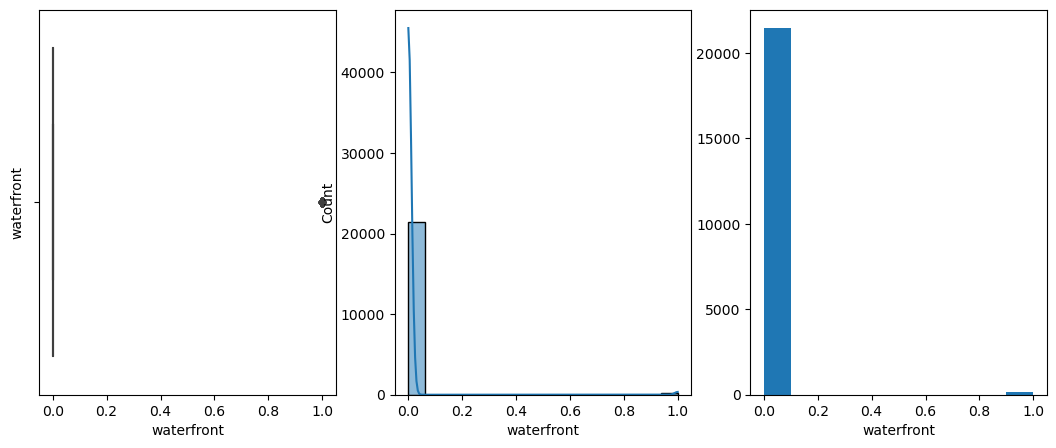

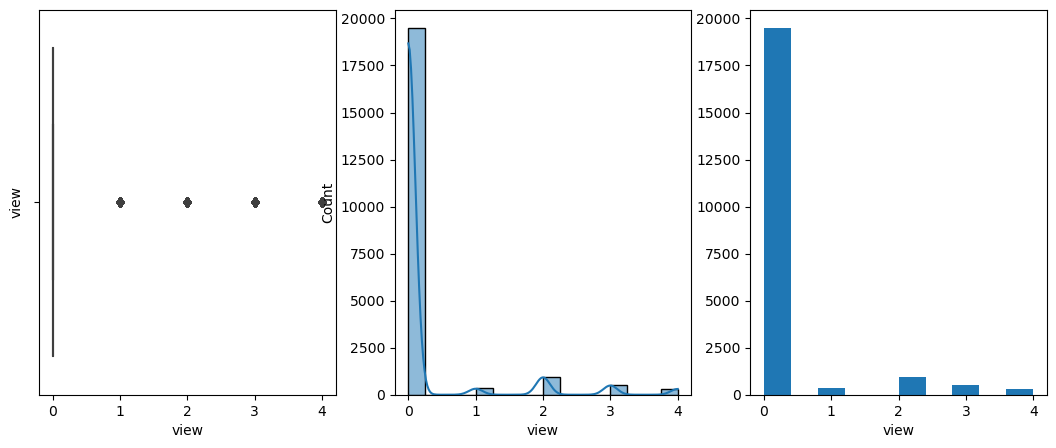

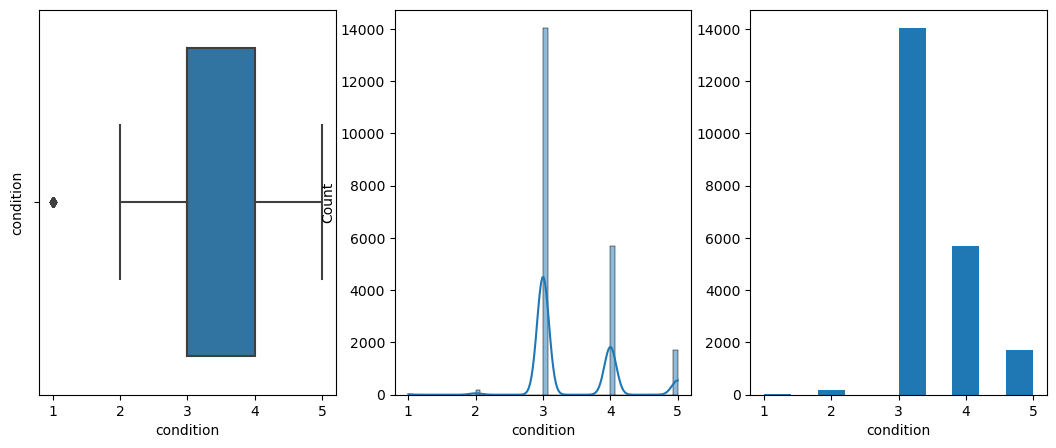

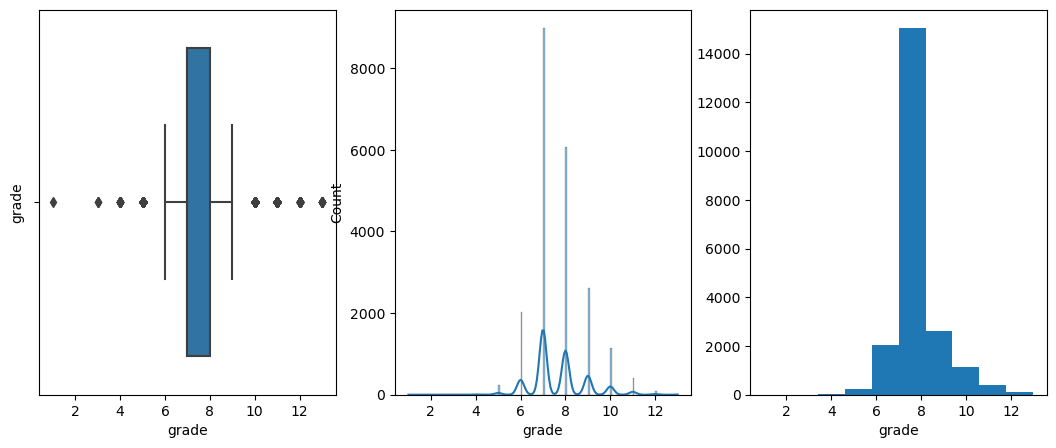

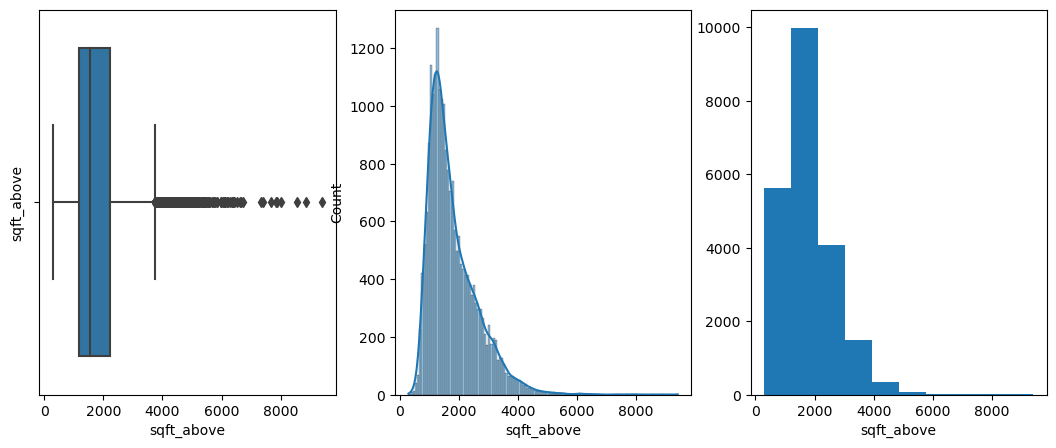

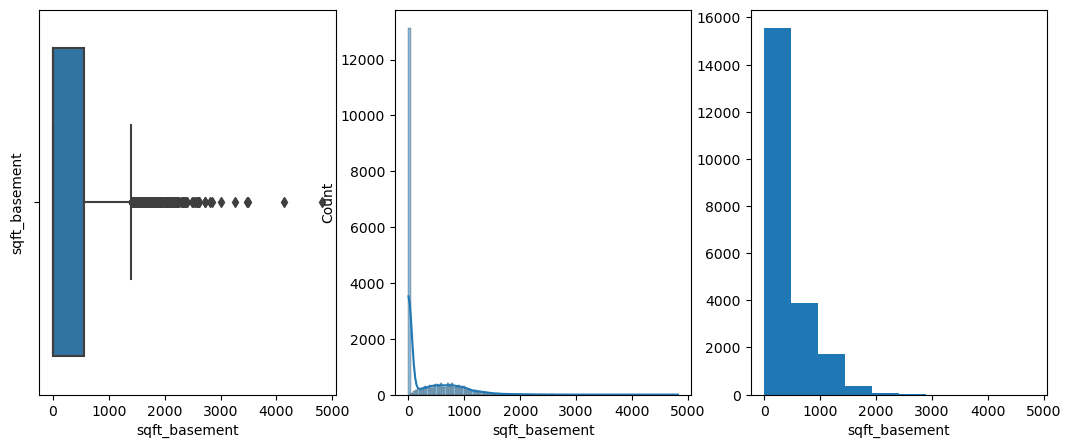

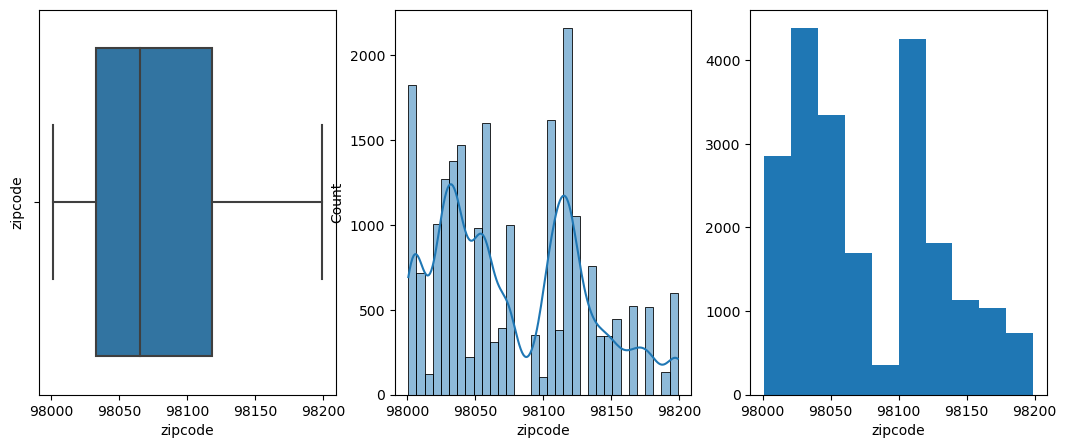

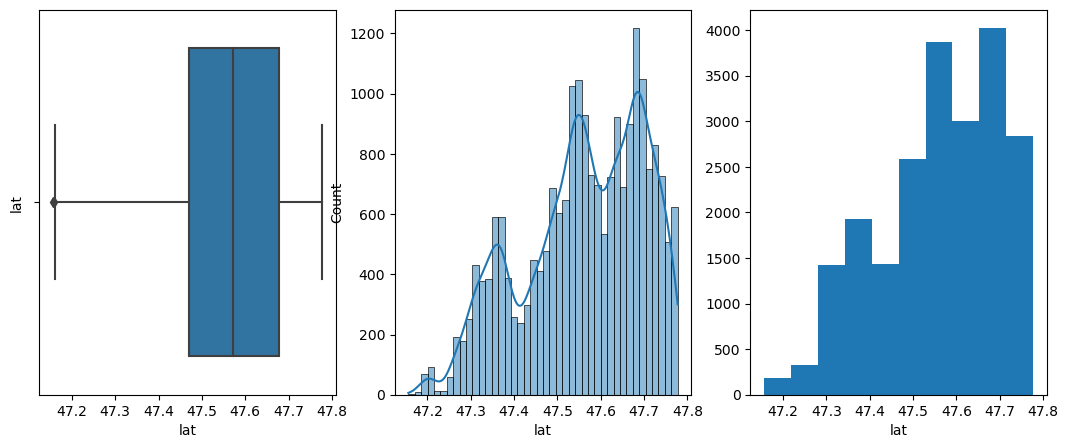

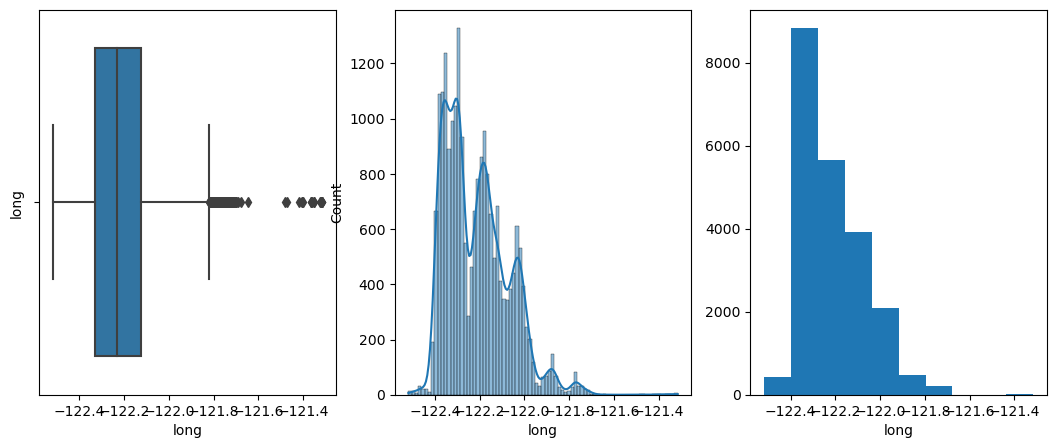

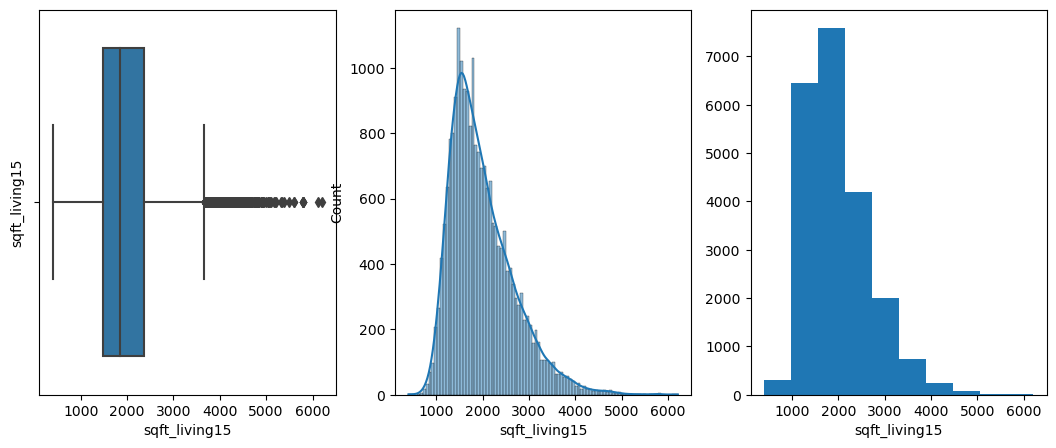

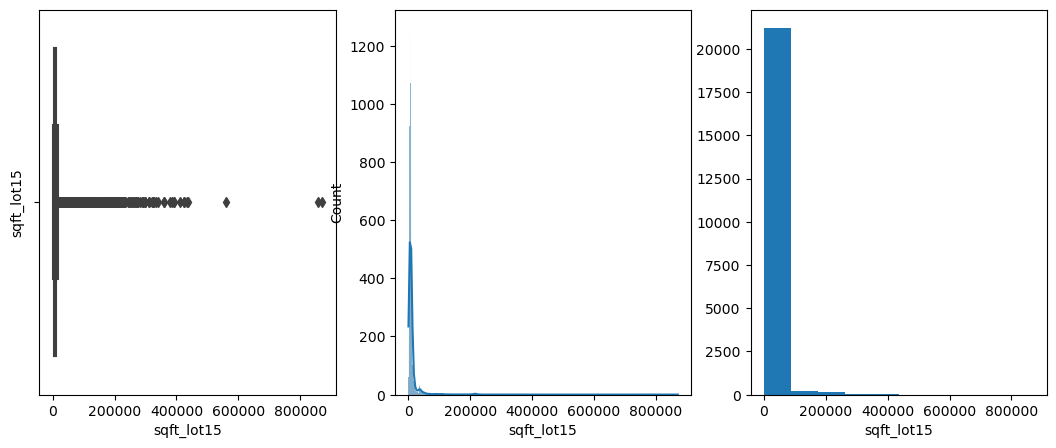

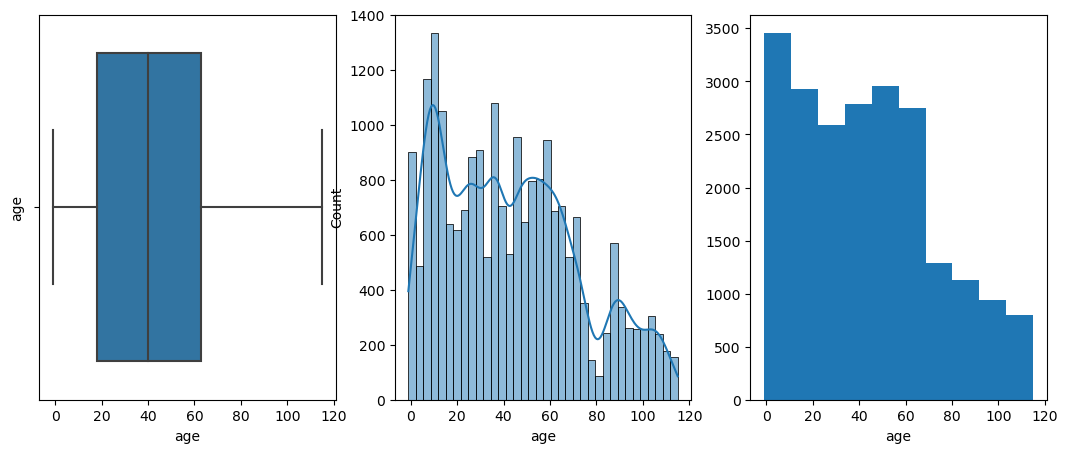

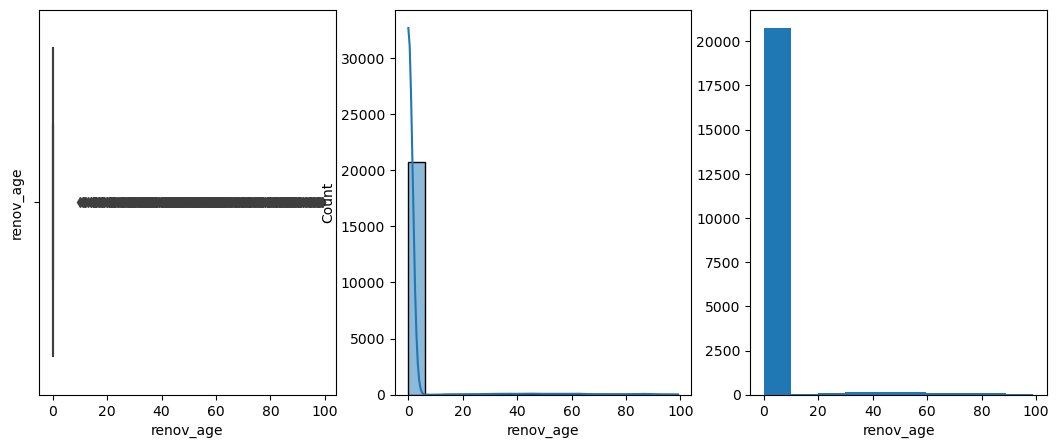

In [14]:
columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15','age','renov_age']

for each in columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
    # BOX PLOT
    # IQR = q3-q1
    # Any value greater than q3 + 1.5(IQR) or lesser than q1 - 1.5(IQR) is considered an Outlier  
    sns.boxplot(x=each, data=h_data, ax=ax1)
    ax1.set_xlabel(each, fontsize=10)
    ax1.set_ylabel(each, fontsize=10)
    ax1.tick_params(labelsize=10)
    
    # DISTPLOT
    # Outliers present if the graph is rightly skewed
    sns.histplot(h_data[each], kde=True,ax=ax2)
    ax2.set_xlabel(each, fontsize=10)
    ax2.tick_params(labelsize=10)
    
    # HISTOGRAM
    # Outliers present if the graph is rightly skewed
    ax3.hist(h_data[each])
    ax3.set_xlabel(each, fontsize=10)
    ax3.tick_params(labelsize=10)


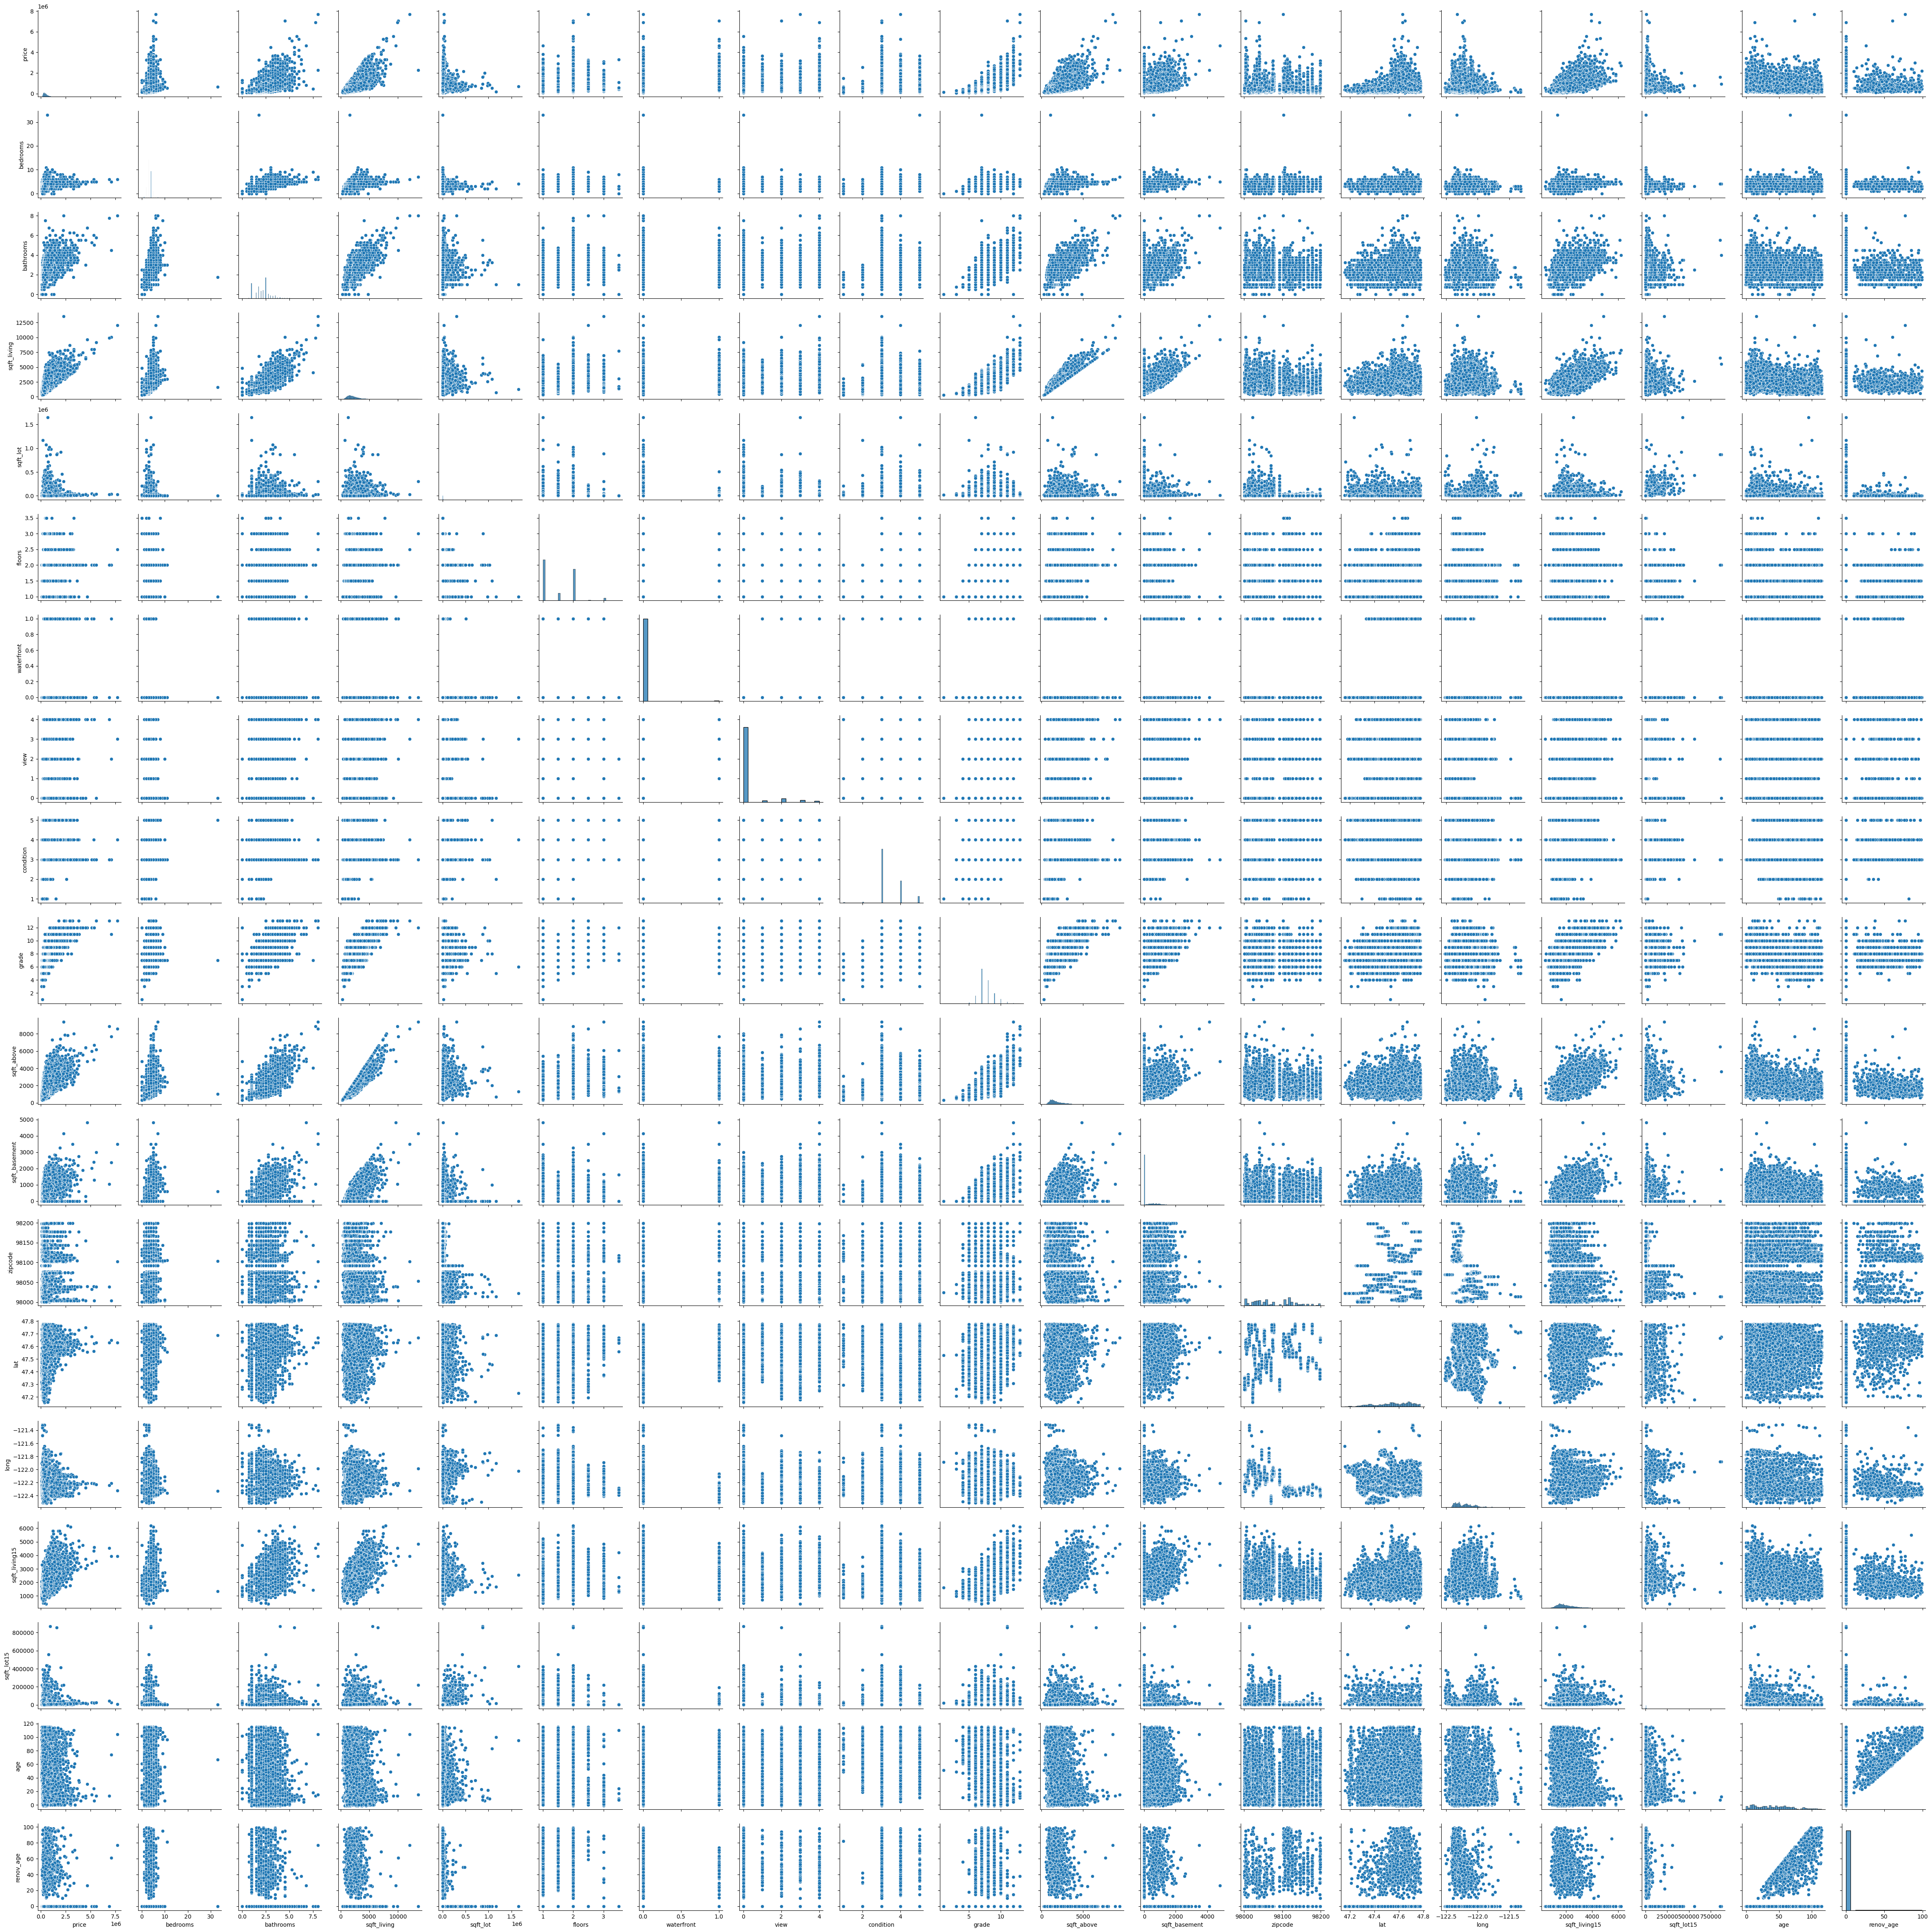

In [15]:
sns.pairplot(h_data)
plt.tight_layout()

<Axes: >

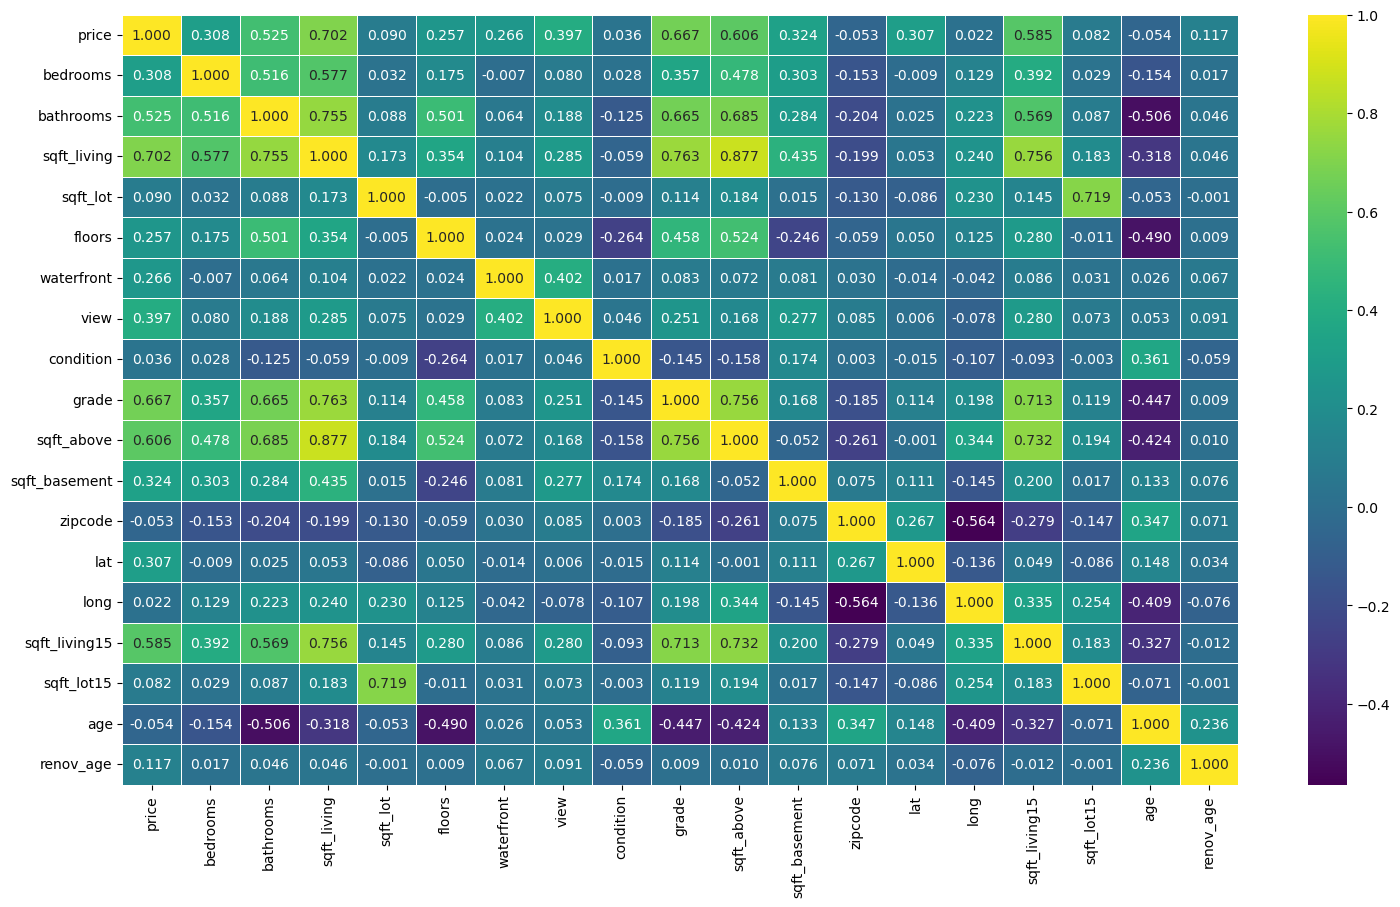

In [16]:
plt.figure(figsize = (18,10))
sns.heatmap(h_data.corr(),
           annot = True,
           linewidth = .5,
           cmap = "viridis",
           fmt='.3f')

In [17]:
def RemoveOutliers(df, col_name):
    q1 = df[col_name].quantile(.25)
    q3 = df[col_name].quantile(.75)
    iqr = q3 - q1
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    a = df[col_name] > upperlimit
    b = df[col_name] < lowerlimit
    df[col_name] = np.where(a, upperlimit, df[col_name])
    df[col_name] = np.where(b, lowerlimit, df[col_name])
    return df

In [18]:
for i in h_data.columns:
    RemoveOutliers(h_data, i)

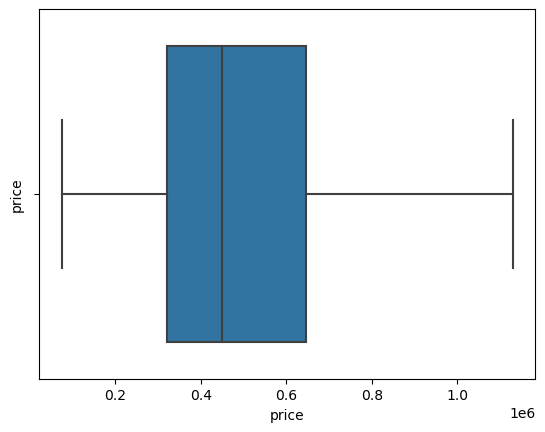

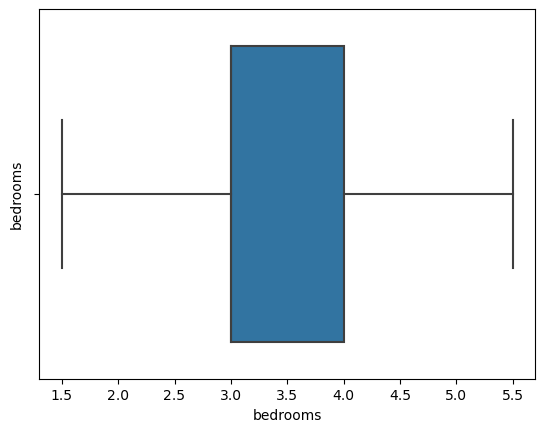

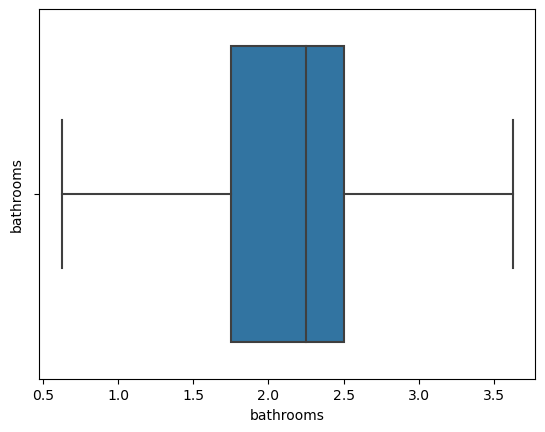

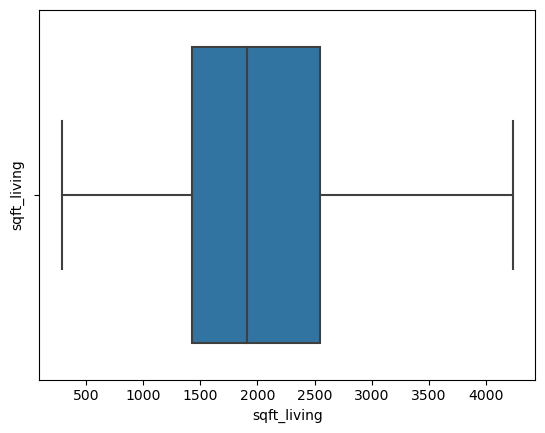

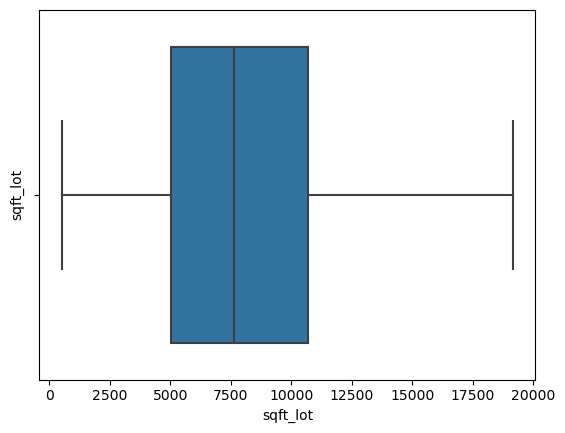

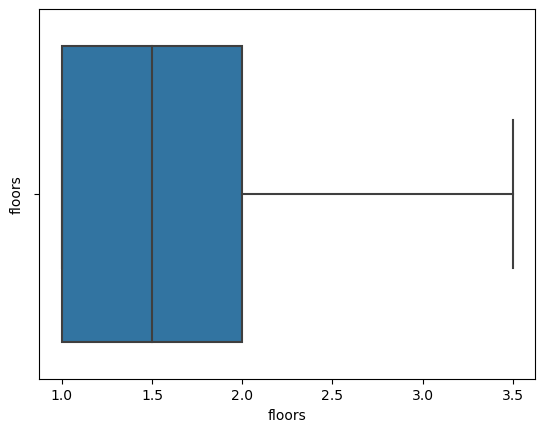

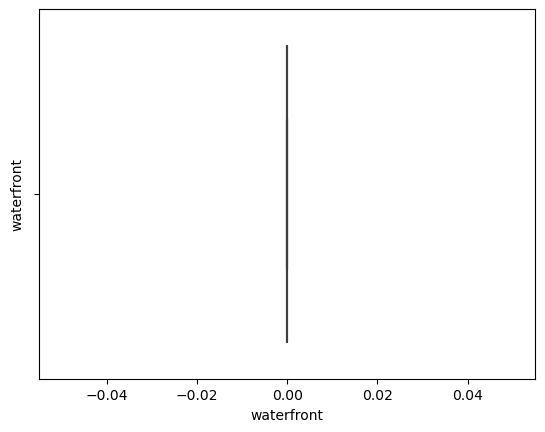

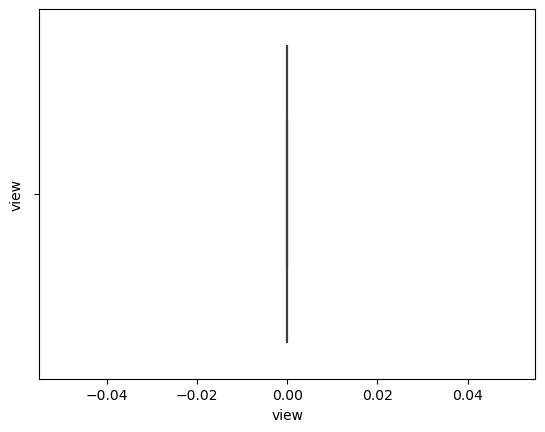

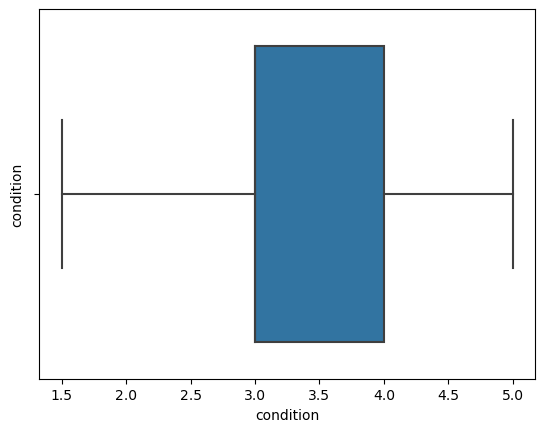

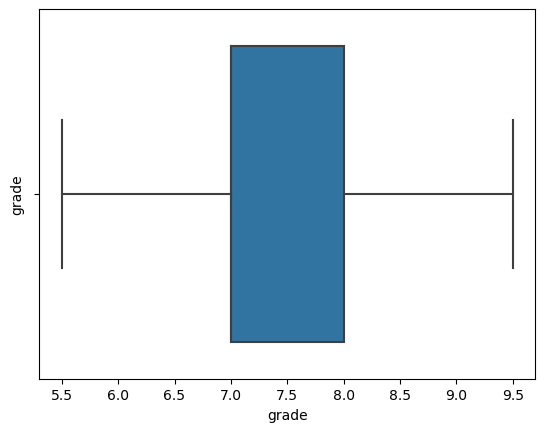

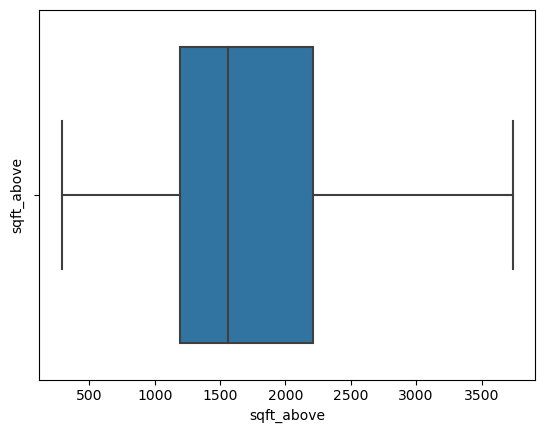

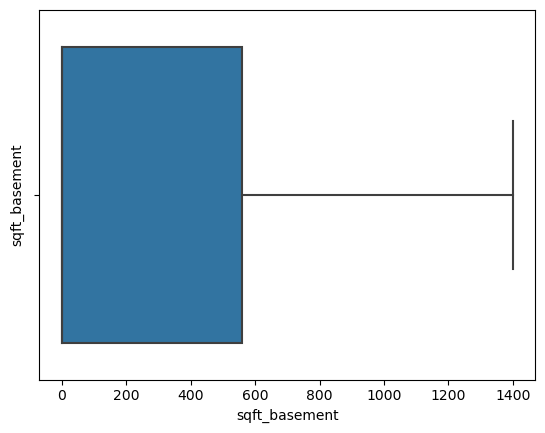

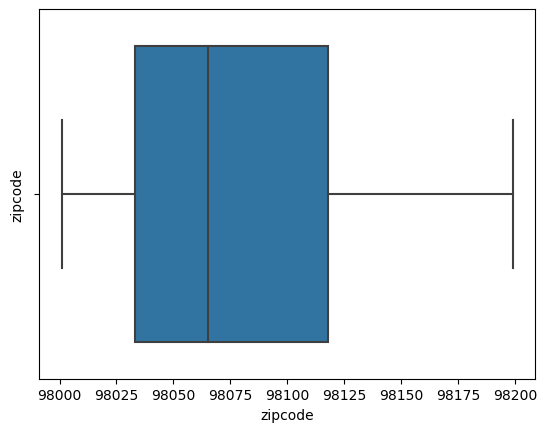

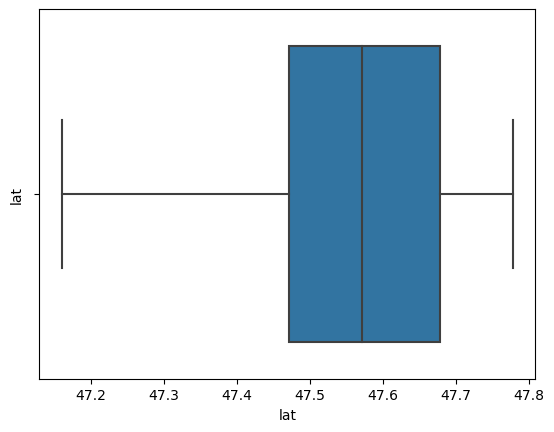

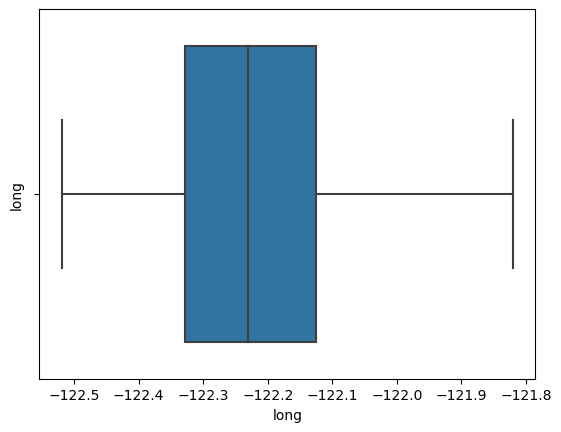

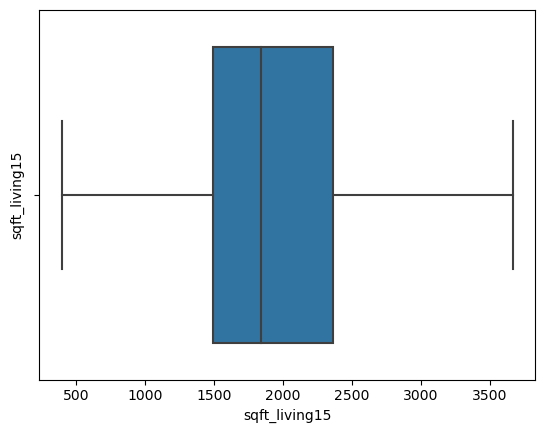

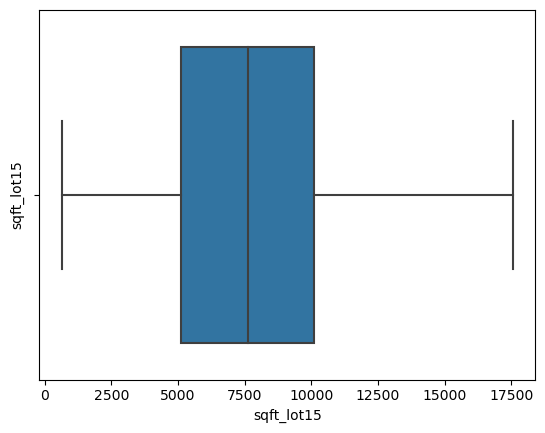

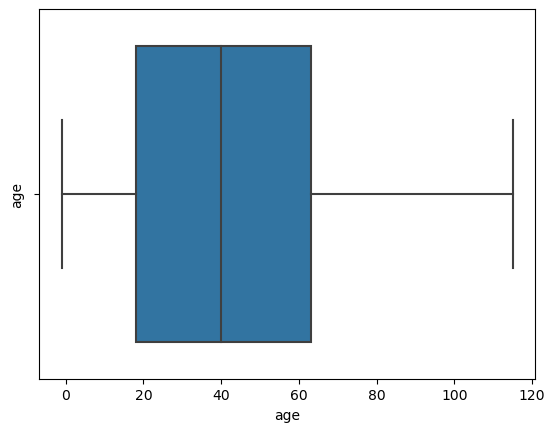

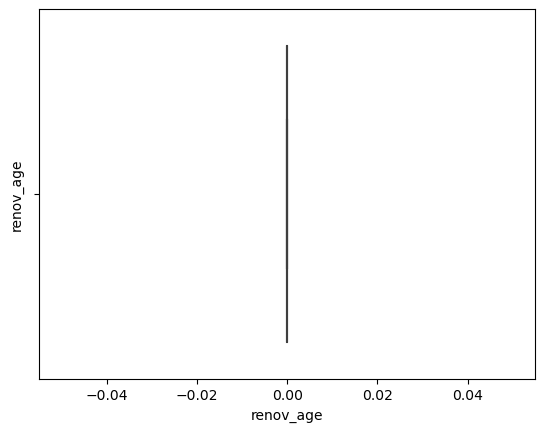

In [19]:
columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15','age','renov_age']

for each in columns:
    fig, ax1 = plt.subplots()
    # BOX PLOT
    # IQR = q3 - q1
    # Any value greater than q3 + 1.5(IQR) or lesser than q1 - 1.5(IQR) is considered an Outlier
    sns.boxplot(x=each, data=h_data, ax=ax1)
    # Set labels and tick parameters
    ax1.set_xlabel(each, fontsize=10)
    ax1.set_ylabel(each, fontsize=10)
    ax1.tick_params(labelsize=10)

    # Show the plot
    plt.show()

In [20]:
from scipy.stats import zscore
scaled_h_data = h_data.apply(zscore)
scaled_h_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0 -1.158764 -0.424771  -1.521414    -1.046218 -0.605431 -0.915427         NaN   
1  0.105652 -0.424771   0.209863     0.609947 -0.289956  0.936506         NaN   
2 -1.326366 -1.595614  -1.521414    -1.534727  0.256576 -0.915427         NaN   
3  0.369656  0.746072   1.248630    -0.116859 -0.734236 -0.915427         NaN   
4 -0.006349 -0.424771  -0.136392    -0.450475 -0.123896 -0.915427         NaN   

   view  condition     grade  sqft_above  sqft_basement   zipcode       lat  \
0   NaN  -0.632496 -0.597874   -0.771668      -0.681086  1.870152 -0.352576   
1   NaN  -0.632496 -0.597874    0.524124       0.278021  0.879568  1.161573   
2   NaN  -0.632496 -1.596664   -1.308309      -0.681086 -0.933388  1.283542   
3   NaN   2.451922 -0.597874   -0.941822       1.500881  1.085160 -0.283291   
4   NaN  -0.632496  0.400916   -0.117227      -0.681086 -0.073636  0.409551   

       long  sqft_living15  sqft_lot15       age  renov_age  
0 -0.306781      -0.978626   -0.606904  0.533865        NaN  
1 -0.758657      -0.439322   -0.151065  0.670036        NaN  
2 -0.131862       1.147774   -0.054122  1.316849        NaN  
3 -1.297992      -0.947809   -0.755871  0.193437        NaN  
4  1.238342      -0.269826   -0.182233 -0.521461        NaN

In [21]:
from sklearn.model_selection import train_test_split

# Here X contains independent attribues and Y contain target/dependent attribute
XTrain, XTest, yTrain, yTest = train_test_split(h_data.drop('price', axis=1), h_data['price'], test_size = .3,
                                               random_state = 8) # random state is used to maintain consistency
XTrain.shape, XTest.shape

((15129, 18), (6484, 18))

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Create a linear regression model
model.fit(XTrain, yTrain) # Train the model on the training set


LinearRegression()

In [23]:
# Make predictions on the test set
y_pred = model.predict(XTest)

In [24]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(yTest, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 15974957633.502153


In [25]:
print("train Accuracy",model.score(XTrain,yTrain))
print("test Accuracy",model.score(XTest,yTest))

train Accuracy 0.7359073868756357
test Accuracy 0.7387121082046991
